## Food Image Classifier

###  Real world applications

#### 1. Ingredient Based Recommendation
#### 2. Nutrition Based Recommendation


### INGREDIENT BASED RECOMMNDATION

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 27 17:38:01 2021

@author: Safi
"""
import numpy as np
import pandas as pd
import os
%matplotlib inline
from tensorflow.keras.preprocessing.image import load_img

def open_images(paths):
    '''
    Opens a batch of images, given the image path(s) as a list
    '''
    images = []
    for path in paths:
        image = load_img(path, target_size=(224,224))
        image = np.array(image)/255.0
        images.append(image)
    return np.array(images)
            
def run_prediction(test_paths):

    saved_models_path = os.path.join(os.getcwd(),'saved_models','model_ResNet_fit_101.h5')
    from tensorflow.keras.models import load_model
    ressnet50_101classes = load_model(saved_models_path)

    predicted_vals = []
    predicted_dish_array = []
    for x in range(0,len(test_paths)) : 
        images = open_images([test_paths[x]])
        predicted = ressnet50_101classes.predict(images)[0]
        predicted = np.argmax(predicted)
        print('-------------------------------------------------------------')
        print('result : ' , x ,  ' -- ' , predicted , ' -- ' , food_classes[predicted] )
        print('-------------------------------------------------------------')
        predicted_dish_index=predicted
        predicted_vals.append([x,predicted])
        predicted_dish_array.append(predicted_dish_index)
        
    return(predicted_dish_index , predicted_dish_array)

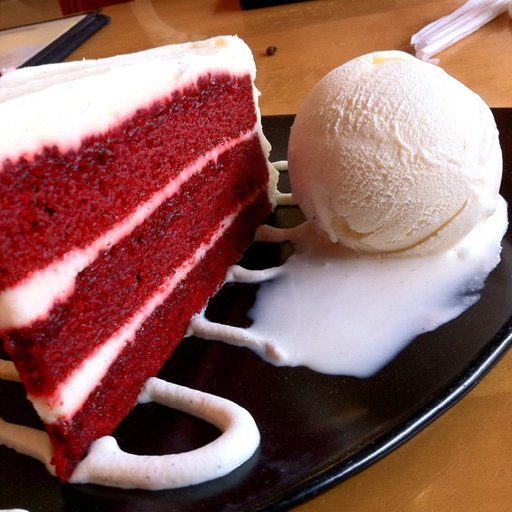

In [2]:
import os
ingredients_file = os.path.join(os.getcwd(), 'Input' , 'ingredients_list.csv')
df=pd.read_csv(ingredients_file)
food_classes = list(df['f_class'])


test_dir = os.path.join(os.getcwd() , 'previous_meal\\')
test_paths = []

for label in os.listdir(test_dir):
        test_paths.append(os.path.join(test_dir,label))


from IPython.display import Image
Image(filename=test_paths[0] , width = 300, height = 300) 

In [3]:
#NOTE : MODEL USED RESNET50 v2
#NOTE : Number of Classes - 101

predicted_dish_index , predicted_dish_array= run_prediction(test_paths)

-------------------------------------------------------------
result :  0  --  83  --  red_velvet_cake
-------------------------------------------------------------


In [4]:

##########################################################################################################


def get_relative_score(check_recipe  , chosen_recipe   )  : 
    f_class = check_recipe['f_class']
    check_recipe = check_recipe['core_ingr']
    row_details = []
    check_recipe = check_recipe.replace(';' , ' ')
    document_1_words = chosen_recipe.split()
    document_2_words = check_recipe.split()
    common = list(set(document_1_words).intersection( set(document_2_words) ))
    common_score = len(common)
    common = ','.join(common)
    
    additional_ingredients = list(set(document_2_words).difference( set(document_1_words) ))
    additional_score = len(additional_ingredients)
    additional_ingredients=','.join(additional_ingredients)
    
    ease_of_making = common_score/(common_score+additional_score)
    
    row_details=[f_class , common , additional_ingredients , common_score , additional_score , ease_of_making]
    return(row_details)




chosen_dish = food_classes[predicted_dish_index] 
chosen_recipe = df[df['f_class']==chosen_dish]['core_ingr'][predicted_dish_index]
chosen_recipe=chosen_recipe.strip()
chosen_recipe = chosen_recipe.replace(';' , ' ')

rd = df.apply(get_relative_score, chosen_recipe = chosen_recipe , axis = 1 )
common_ingredients_dataframe = pd.DataFrame(list(rd) , columns = ['f_class','common_ingredients','additional_ingredients','common_score', 'additional_score' , 'ease_of_making'])

ingredient_recommendation = common_ingredients_dataframe.sort_values(['ease_of_making'] , ascending = False)

chosen_dish_ingredients = ingredient_recommendation[ingredient_recommendation['f_class'] == chosen_dish]
ingredient_recommendation = ingredient_recommendation[ingredient_recommendation['f_class'] != chosen_dish]

chosen_dish_ingredients = chosen_dish_ingredients.common_ingredients.T
chosen_dish_ingredients
number_of_top_dishes = 5

ingredient_recommendation = ingredient_recommendation.head(number_of_top_dishes)

print('Dish Identified from Image : ', chosen_dish)

display(pd.DataFrame(chosen_dish_ingredients.values[0].split(',') , columns = ['Ingredients'] ).style.hide_index())

ingredient_recc_op1 = ingredient_recommendation[['f_class','common_score','additional_score' , 'additional_ingredients']]
ingredient_recc_op1=ingredient_recc_op1.rename(columns={"f_class": "Dish" , 'common_score' : 'Common Ingredients', 'additional_score':'Additional Ingredients' , 'additional_ingredients':'List Of Additional Ingredients'})
ingredient_recc_op1.set_index('Dish')



############################################################################################################


Dish Identified from Image :  red_velvet_cake


Ingredients
cheese
red
salt
egg
coloring
vinegar
butter
cake
oil
food


,Common Ingredients,Additional Ingredients,List Of Additional Ingredients
Dish,,,
chocolate_mousse,5,0,
cheesecake,5,1,ham
waffles,6,2,"milk,flour"
chocolate_cake,3,1,whipping
bread_pudding,5,2,"bread,milk"


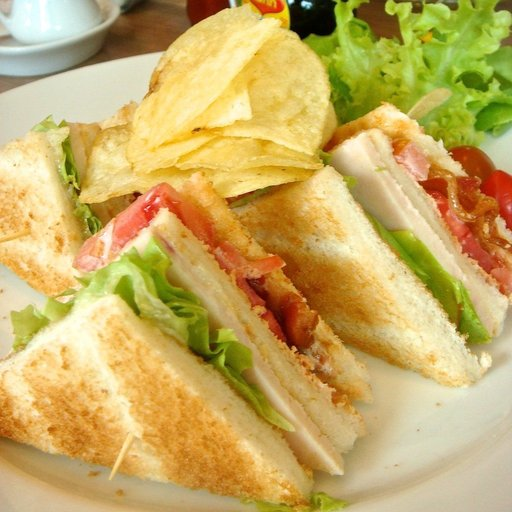

In [5]:
#Ingredinet Based Recommendation  : 2
test_dir = os.path.join(os.getcwd() , 'previous_meal_2\\')
test_paths = []

for label in os.listdir(test_dir):
        test_paths.append(os.path.join(test_dir,label))

from IPython.display import Image
Image(filename=test_paths[0] , width = 300, height = 300) 

In [6]:
predicted_dish_index , predicted_dish_array   = run_prediction(test_paths)

-------------------------------------------------------------
result :  0  --  25  --  club_sandwich
-------------------------------------------------------------


In [7]:
chosen_dish = food_classes[predicted_dish_index] 
chosen_recipe = df[df['f_class']==chosen_dish]['core_ingr'][predicted_dish_index]
chosen_recipe=chosen_recipe.strip()
chosen_recipe = chosen_recipe.replace(';' , ' ')

rd = df.apply(get_relative_score, chosen_recipe = chosen_recipe , axis = 1 )
common_ingredients_dataframe = pd.DataFrame(list(rd) , columns = ['f_class','common_ingredients','additional_ingredients','common_score', 'additional_score' , 'ease_of_making'])

ingredient_recommendation = common_ingredients_dataframe.sort_values(['ease_of_making'] , ascending = False)

chosen_dish_ingredients = ingredient_recommendation[ingredient_recommendation['f_class'] == chosen_dish]
ingredient_recommendation = ingredient_recommendation[ingredient_recommendation['f_class'] != chosen_dish]

chosen_dish_ingredients = chosen_dish_ingredients.common_ingredients.T
chosen_dish_ingredients

number_of_top_dishes = 1

ingredient_recommendation = ingredient_recommendation.head(number_of_top_dishes)

print('Dish Identified from Image : ', chosen_dish)

display(pd.DataFrame(chosen_dish_ingredients.values[0].split(',') , columns = ['Ingredients'] ).style.hide_index())

ingredient_recc_op1 = ingredient_recommendation[['f_class','common_score','additional_score' , 'additional_ingredients']]
ingredient_recc_op1=ingredient_recc_op1.rename(columns={"f_class": "Dish" , 'common_score' : 'Common Ingredients', 'additional_score':'Additional Ingredients' , 'additional_ingredients':'List Of Additional Ingredients'})
ingredient_recc_op1.set_index('Dish')


Dish Identified from Image :  club_sandwich


Ingredients
chick'n
fat
farms
tomato
bread
cheddar
patties
morningstar
lettuce
bacon


,Common Ingredients,Additional Ingredients,List Of Additional Ingredients
Dish,,,
grilled_cheese_sandwich,3,2,"onion,oil"


### Nutrition Based Recommendation

In [8]:
#Calculate Reuirements as per User Macros
gender = input("gender (Male/Female): ")
weight = float(input("Weight (kg) : "))
height = float(input("Height (cm) : "))
age = int(input("Age (Years) : ")) 

print('''
Choose Activity Level (Enter Option Only : )
1. Sedentary (Little or No Excercise)
2. Lightly Active (Excercise one to three days a week)
3. Moderately Active (Excercise three to five days a week)
4. Active (Excercise six to seven days a week)
5. Very Active (Hard Excercise six to seven days a week)
''')
activity_level = int(input("Activity Level : ")) 


gender (Male/Female): Female
Weight (kg) : 80
Height (cm) : 183
Age (Years) : 26

Choose Activity Level (Enter Option Only : )
1. Sedentary (Little or No Excercise)
2. Lightly Active (Excercise one to three days a week)
3. Moderately Active (Excercise three to five days a week)
4. Active (Excercise six to seven days a week)
5. Very Active (Hard Excercise six to seven days a week)

Activity Level : 3


In [9]:

def get_activity_coeff(activity_level_param):
    if(activity_level_param ==1):
        return 1.2
    if(activity_level_param ==2):
        return 1.375
    if(activity_level_param ==3):
        return 1.55
    if(activity_level_param ==4):
        return 1.725
    if(activity_level_param ==5):
        return 1.9
    
    
activity_coef =  get_activity_coeff(activity_level)       
        
if(gender == 'Male'): 
    bmr = 655.1 + (9.653 * weight) + (1.850 * 183) - (4.676 * age)
else:
    bmr = 66.47 + (13.75 * weight) + (5.003 * 183) - (6.755 * age)
    
calories_required = bmr * activity_coef

protein_required = (65/2000) * calories_required
carb_required = (280/2000 ) * calories_required
fats_required = (60/2000) * calories_required
cumulative_required = protein_required + carb_required + fats_required

In [10]:
print('As per given Macros : ')
print('' )
print('Daily Calories Required : ' , round(calories_required,4) , 'kcal')
print('Daily Protein Required  : ' , round(protein_required, 4) ,  'g')
print('Daily Carb Required     : ' , round(carb_required,    4) ,  'g')
print('Daily Fat Required      : ' , round(fats_required ,   4) ,  'g')

As per given Macros : 

Daily Calories Required :  2954.903 kcal
Daily Protein Required  :  96.0343 g
Daily Carb Required     :  413.6864 g
Daily Fat Required      :  88.6471 g


 Breakfast 


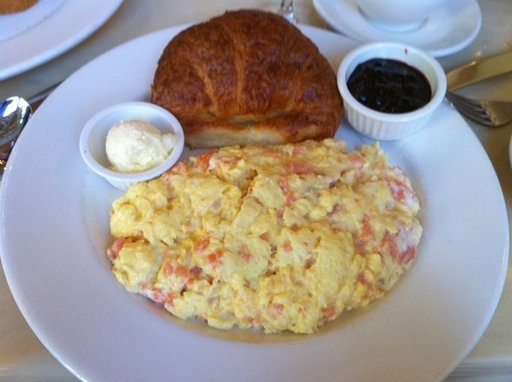

In [11]:
%matplotlib inline
test_dir = os.path.join(os.getcwd() , 'day_meals\\')
test_paths = []

for label in os.listdir(test_dir):
        test_paths.append(os.path.join(test_dir,label))
      
print(' Breakfast ')
from IPython.display import Image
Image(filename=test_paths[0] , width = 500, height = 500) 


 LUNCH 


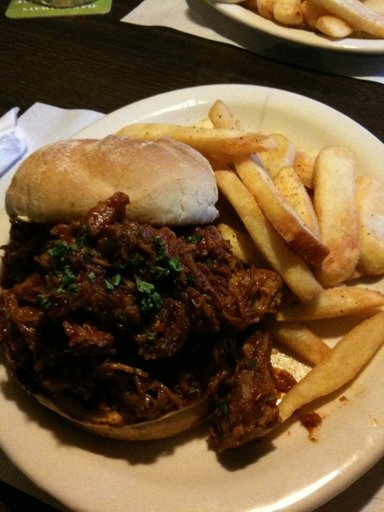

In [12]:
print(' LUNCH ')
from IPython.display import Image
Image(filename=test_paths[1] , width = 500, height = 500) 

In [13]:
predicted_dish_index , predicted_dish_array = run_prediction(test_paths)
print(predicted_dish_array)


-------------------------------------------------------------
result :  0  --  67  --  omelette
-------------------------------------------------------------
-------------------------------------------------------------
result :  1  --  80  --  pulled_pork_sandwich
-------------------------------------------------------------
[67, 80]


In [14]:
import pandas as pd
nutr_df = pd.read_csv('nutrition_df2.csv', index_col = 'Unnamed: 0')
nutr_df = nutr_df.fillna('0g')
nutr_df.index = nutr_df.index.set_names(['nutrient'])
nutr_df= nutr_df.reset_index()
nutr_df = nutr_df[nutr_df['nutrient'].isin(['Calories','Protein','Carbohydrates','Fat'])]


nutr_df.columns = ['nutrient'] + food_classes
nutr_df = nutr_df.T
new_header = nutr_df.iloc[0]
nutr_df = nutr_df[1:]
nutr_df.columns = new_header
nutr_df.index = nutr_df.index.set_names(['f_class'])
nutr_df=nutr_df.reset_index()

cal_d1 = 0
fat_d1 = 0
prot_d1 = 0
carb_d1 = 0

import re
def remove_characters(rawdata):
    rawdata2 = re.sub('[^0-9,.]', '', rawdata)
    return float(rawdata2)


dishes_chosen = []
for dish_index in predicted_dish_array:
    chosen_dish = food_classes[dish_index] 
    dishes_chosen.append(chosen_dish)
    cal_d1 = cal_d1 + remove_characters(nutr_df[nutr_df['f_class'] == chosen_dish].Calories.values[0])
    fat_d1 = fat_d1 + remove_characters(nutr_df[nutr_df['f_class'] == chosen_dish].Fat.values[0])
    prot_d1 = prot_d1 + remove_characters(nutr_df[nutr_df['f_class'] == chosen_dish].Protein.values[0])
    carb_d1 = carb_d1 + remove_characters(nutr_df[nutr_df['f_class'] == chosen_dish].Carbohydrates.values[0])

filt_nutr_df = nutr_df[~nutr_df['f_class'].isin(dishes_chosen)]

result_set = pd.DataFrame(columns = ['f_class','cal_deficit','protein_deficit','carb_deficit','fat_deficit' , 'best_meal'])

i=0
for index, row in filt_nutr_df.iterrows():
    cal_deficit = calories_required - cal_d1 - remove_characters(row.Calories)
    protein_deficit = protein_required - prot_d1 - remove_characters(row.Protein)
    carb_deficit = carb_required - carb_d1 - remove_characters(row.Carbohydrates)
    fat_deficit = fats_required - fat_d1 - remove_characters(row.Fat)
    best_meal = abs(protein_deficit) + abs(carb_deficit) + abs(fat_deficit)
    result_set.loc[i] = [row.f_class , cal_deficit , protein_deficit , carb_deficit ,fat_deficit , best_meal ]
    i+=1
    
nutrient_recommended_meal = result_set.sort_values('best_meal')
nutrient_recommended_meal.head(3).set_index('f_class')

,cal_deficit,protein_deficit,carb_deficit,fat_deficit,best_meal
f_class,,,,,
fish_and_chips,1357.90295,32.634346,145.386413,-8.352911,186.37367
fried_calamari,1164.90295,26.434346,245.286413,-6.052911,277.77367
chicken_quesadilla,1030.90295,6.034346,251.986413,-20.352911,278.37367


In [15]:
print('Meal Chosen : ')
display(nutrient_recommended_meal.head(1).set_index('f_class'))

Meal Chosen : 


,cal_deficit,protein_deficit,carb_deficit,fat_deficit,best_meal
f_class,,,,,
fish_and_chips,1357.90295,32.634346,145.386413,-8.352911,186.37367


In [16]:

dishes_of_day = [ food_classes[predicted_dish_array[1]] , food_classes[predicted_dish_array[0]] , nutrient_recommended_meal.f_class.values[0] ]
nutrients = ['Protein' , 'Fat'  , 'Carbohydrates']
nutrient_values = { 'Protein' : [] , 'Fat' : [] , 'Carbohydrates' : [] }
for nut in nutrients : 
    for dish in dishes_of_day :
        meal_1 = remove_characters(nutr_df[nutr_df['f_class'] == dish][nut].values[0])
        sum_current_nut = sum(nutrient_values[nut])
        nutrient_values[nut].append(sum_current_nut + meal_1 )
nutrient_values=pd.DataFrame(nutrient_values)
nutrient_values['cumulative_nutrients'] = nutrient_values.sum(axis=1)
nutrient_values= nutrient_values.set_index([pd.Index(['Breakfast','Lunch','Dinner'])])

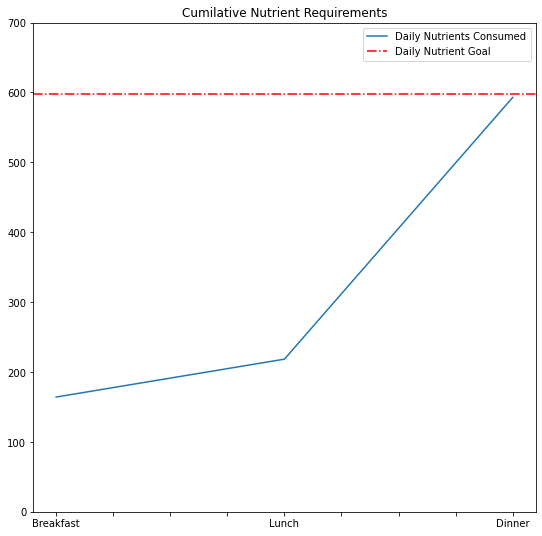

In [17]:
from matplotlib import pyplot as plt

f = plt.figure()
f.set_figwidth(9)
f.set_figheight(9)

nutrient_values.cumulative_nutrients.plot( label = 'Daily Nutrients Consumed')
plt.axhline(y=cumulative_required, color='r', linestyle='-.' , label='Daily Nutrient Goal')
plt.title('Cumilative Nutrient Requirements', fontdict=None, loc=None)
plt.ylim([0, 700])
plt.legend()
